In [1]:
from scipy.io import wavfile,loadmat
from scipy.signal import stft,get_window, correlate
import librosa
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../") 

import pysepm as pm #import fwSNRseg,SNRseg,llr,wss, composite,pesq,stoi

In [3]:
fs, cleanSig = wavfile.read("./speech.wav")
fs, enhancedSig = wavfile.read("./speech_bab_0dB.wav")
bsd,clean,enh=pm.bsd(cleanSig, enhancedSig, fs)# should be  3.3554
print(bsd)

include pre-emphasis
bark filter not tested
236903.55


In [15]:
nom=np.sum(np.square(clean-enh),axis=0)

In [12]:
denom=np.sum(np.square(clean),axis=0)

In [17]:
np.mean(nom/denom)

236903.55

In [2]:
a = pm.reverberationMeasures.barks(22050,2048,24)

bark filter not tested


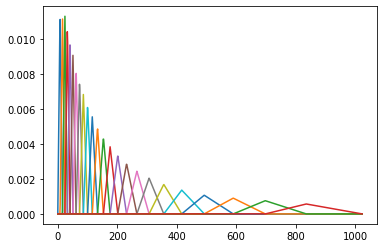

In [4]:
plt.plot(a.T);

In [19]:
a.T[0:100,:]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17526951, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.35053903, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

(1, 3)

In [8]:
resultsOrig = loadmat('results.mat')
resultsOrig=resultsOrig['results']


In [3]:
filePairs=[]
filePairs.append(['speech.wav','speech_bab_0dB.wav'])
filePairs.append(['sp04.wav','sp04_babble_sn10.wav'])
filePairs.append(['enhanced.wav','sp04_babble_sn10.wav'])
filePairs.append(['sp04.wav','enhanced.wav'])
filePairs.append(['S_03_01.wav','S_03_01_babble_sn0_klt.wav'])
filePairs.append(['cleanSample_valIdx12.wav','noisySample_valIdx12.wav'])
filePairs.append(['cleanSample_valIdx12.wav','enhancedSample_valIdx12.wav'])
filePairs.append(['cleanSample_valIdx356.wav','noisySample_valIdx356.wav'])
filePairs.append(['cleanSample_valIdx356.wav','enhancedSample_valIdx356.wav'])

In [17]:
results = np.zeros((len(filePairs),16))
for idx,filePair in enumerate(filePairs):
    fs, cleanSig = wavfile.read(filePair[0])
    fs, enhancedSig = wavfile.read(filePair[1])
    if cleanSig.dtype=='int16':
        cleanSig = cleanSig.astype('float')/abs(np.iinfo(cleanSig.dtype).min)
    if enhancedSig.dtype=='int16':
        enhancedSig = enhancedSig.astype('float')/abs(np.iinfo(enhancedSig.dtype).min)
    
    if cleanSig.shape!=enhancedSig.shape:
        minLen=min((len(cleanSig),len(enhancedSig)))
        cleanSig = cleanSig[0:minLen]
        enhancedSig = enhancedSig[0:minLen]
    cleanSig = cleanSig/np.max(np.abs(cleanSig))
    enhancedSig = enhancedSig/np.max(np.abs(enhancedSig))
    results[idx,0]=pm.fwSNRseg(cleanSig, enhancedSig, fs)
    results[idx,1]=pm.SNRseg(cleanSig, enhancedSig, fs)
    results[idx,2]=pm.llr(cleanSig, enhancedSig, fs)
    results[idx,3]=pm.wss(cleanSig, enhancedSig, fs)
    results[idx,4]=pm.cepstrum_distance(cleanSig, enhancedSig, fs)
    results[idx,5]=pm.stoi(cleanSig, enhancedSig, fs)
    CSIIh,CSIIm,CSIIl=pm.csii(cleanSig, enhancedSig, fs)
    results[idx,6]=CSIIh
    results[idx,7]=CSIIm
    results[idx,8]=CSIIl
    results[idx,9]=CSIIl
    
    if (fs!=16000) | (fs!=8000):
        cleanSig=librosa.core.resample(cleanSig, fs,16000)
        enhancedSig=librosa.core.resample(enhancedSig,fs,16000)        
        fs = 16000        
    mos_lqo, pesq_mos = pm.pesq(cleanSig, enhancedSig,fs)   
    results[idx,10] = mos_lqo
    Csig,Cbak,Covl=pm.composite(cleanSig, enhancedSig, fs)
    results[idx,11]=Csig
    results[idx,12]=Cbak
    results[idx,13]=Covl
    results[idx,14]=pm.ncm(cleanSig, enhancedSig, fs)
    ratio, energy = pm.srmr(enhancedSig,fs, n_cochlear_filters=23, low_freq=125, min_cf=4, max_cf=128, fast=False)
    results[idx,15]= ratio


/usr/local/lib/python3.6/dist-packages/srmrpy/hilbert.py:69: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


In [23]:
relErr=(results-resultsOrig)/(resultsOrig+1e-20)

In [25]:
relErr[:,-1]*100

array([ 0.89866235,  9.87468543,  9.87757872,  8.07671193, -4.58756266,
        3.43626201,  3.00168894,  0.47358044,  2.37719669])

# frequency weighted segmental SNR (fwSNRSeg)

In [2]:
fs, cleanSig = wavfile.read("./speech.wav")
fs, enhancedSig = wavfile.read("./speech_bab_0dB.wav")
pm.fwSNRseg(cleanSig, enhancedSig, fs)# should be  3.3554


3.355400106582439

In [3]:
fs, cleanSig = wavfile.read("./sp04.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.fwSNRseg(cleanSig, enhancedSig, fs)# should be  10.0938


10.093763940018944

In [4]:
fs, cleanSig = wavfile.read("./enhanced.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.fwSNRseg(cleanSig, enhancedSig[0:len(cleanSig)], fs) # should be  12.5602


12.560192001043312

# Segmental SNR (SNRSeg)

In [123]:
fs, cleanSig = wavfile.read("./speech.wav")
fs, enhancedSig = wavfile.read("./speech_bab_0dB.wav")
pm.SNRseg(cleanSig, enhancedSig, fs)# should be -4.0387


-4.0386645840708395

In [124]:
fs, cleanSig = wavfile.read("./sp04.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.SNRseg(cleanSig, enhancedSig, fs)# should be 0.9595


0.959472693785315

In [125]:
fs, cleanSig = wavfile.read("./enhanced.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.SNRseg(cleanSig, enhancedSig[0:len(cleanSig)], fs) # should be 5.2814


5.281379775527017

# Log Likelihood Ratio (LLR)

In [8]:
fs, cleanSig = wavfile.read("./speech.wav")
fs, enhancedSig = wavfile.read("./speech_bab_0dB.wav")
pm.llr(cleanSig, enhancedSig, fs)# should be 0.9593


0.9607521284183373

In [9]:
fs, cleanSig = wavfile.read("./sp04.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.llr(cleanSig, enhancedSig, fs)# should be 0.6400


0.6399952859426925

In [10]:
fs, cleanSig = wavfile.read("./enhanced.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.llr(cleanSig, enhancedSig[0:len(cleanSig)], fs) # should be 0.2227

0.222739174060473

# Weighted Spectral Slope (WSS)

In [11]:
fs, cleanSig = wavfile.read("./speech.wav")
fs, enhancedSig = wavfile.read("./speech_bab_0dB.wav")
pm.wss(cleanSig, enhancedSig, fs)# should be 52.6579

52.65786610835284

In [12]:
fs, cleanSig = wavfile.read("./sp04.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.wss(cleanSig, enhancedSig, fs)# should be 37.6490

37.64901719583485

In [13]:
fs, cleanSig = wavfile.read("./enhanced.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.wss(cleanSig, enhancedSig[0:len(cleanSig)], fs) # should be 19.6127

19.612652522957717

# PESQ

In [14]:
fs, cleanSig = wavfile.read("./speech.wav")
fs, enhancedSig = wavfile.read("./speech_bab_0dB.wav")
pm.pesq(cleanSig, enhancedSig, fs)# should be 1.0832

1.0832337141036987

In [15]:
fs, cleanSig = wavfile.read("./sp04.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.pesq(cleanSig, enhancedSig, fs)# should be 2.4634

2.463416557463939

In [16]:
fs, cleanSig = wavfile.read("./enhanced.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.pesq(cleanSig, enhancedSig[0:len(cleanSig)], fs) # should be 2.7293

2.7307331381405935

# Composite Objective Speech Quality Measure

In [17]:
fs, cleanSig = wavfile.read("./speech.wav")
fs, enhancedSig = wavfile.read("./speech_bab_0dB.wav")
pm.composite(cleanSig, enhancedSig, fs)# should be (2.2837,1.5287,1.6055)

(2.2836551944868853, 1.5287447837866348, 1.6054929873448194)

In [18]:
fs, cleanSig = wavfile.read("./sp04.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.composite(cleanSig, enhancedSig, fs)# should be (3.5810,2.6084,2.9858)

(3.581043880153211, 2.608416773805394, 2.9858296219849687)

In [19]:
fs, cleanSig = wavfile.read("./enhanced.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.composite(cleanSig, enhancedSig[0:len(cleanSig)], fs) # should be (4.3330,3.1340,3.5397)

(4.333919599483931, 3.1347287982287013, 3.5409091514235116)

# Cepstrum Distance Objective Speech Quality Measure

In [20]:
fs, cleanSig = wavfile.read("./speech.wav")
fs, enhancedSig = wavfile.read("./speech_bab_0dB.wav")
pm.cepstrum_distance(cleanSig, enhancedSig, fs)# should be 6.388916397199216

6.3889163971985266

In [21]:
fs, cleanSig = wavfile.read("./sp04.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.cepstrum_distance(cleanSig, enhancedSig, fs)# should be 4.265933203079426

4.26593320307941

In [22]:
fs, cleanSig = wavfile.read("./enhanced.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.cepstrum_distance(cleanSig, enhancedSig, fs)# should be 2.396989575452212

2.3969895754520847

# STOI

In [23]:
fs, cleanSig = wavfile.read("./speech.wav")
fs, enhancedSig = wavfile.read("./speech_bab_0dB.wav")
pm.stoi(cleanSig, enhancedSig, fs)# should be 0.6739

0.6739177895331303

In [24]:
fs, cleanSig = wavfile.read("./sp04.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.stoi(cleanSig, enhancedSig, fs)# should be 0.8934

0.8934582975768947

In [25]:
fs, cleanSig = wavfile.read("./enhanced.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.stoi(cleanSig, enhancedSig[0:len(cleanSig)], fs) # should be 0.8917

0.8916166026077093

In [26]:
from pesq import pesq
from scipy.signal import stft,get_window,correlate,resample


In [27]:
        numSamples=round(len(cleanSig)/fs*16000)
        fs = 16000
        pesq_mos = pesq(fs,resample(cleanSig, numSamples), resample(enhancedSig, numSamples), 'wb')


# NCM

In [29]:
fs, cleanSig = wavfile.read("./speech.wav")
fs, enhancedSig = wavfile.read("./speech_bab_0dB.wav")
pm.ncm(cleanSig, enhancedSig, fs)# should be 

0.5328171511427755

In [30]:
fs, cleanSig = wavfile.read("./sp04.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.ncm(cleanSig, enhancedSig, fs)# should be 

0.9050747979588915

In [31]:
fs, cleanSig = wavfile.read("./enhanced.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.ncm(cleanSig, enhancedSig[0:len(cleanSig)], fs) # should be 

0.9633151692925036

# CSII

In [33]:
fs, cleanSig = wavfile.read("./speech.wav")
fs, enhancedSig = wavfile.read("./speech_bab_0dB.wav")
pm.csii(cleanSig, enhancedSig, fs)# should be 

(0.5747598820639694, 0.3343790504514923, 0.02616214182320878)

In [34]:
fs, cleanSig = wavfile.read("./sp04.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.csii(cleanSig, enhancedSig, fs)# should be 

(0.9121855615693153, 0.622560057685167, 0.20949166842622877)

In [35]:
fs, cleanSig = wavfile.read("./enhanced.wav")
fs, enhancedSig = wavfile.read("./sp04_babble_sn10.wav")
pm.csii(cleanSig, enhancedSig[0:len(cleanSig)], fs) # should be 

(0.9761576893384923, 0.7825384403451644, 0.6281655003905069)